In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 
import cv2

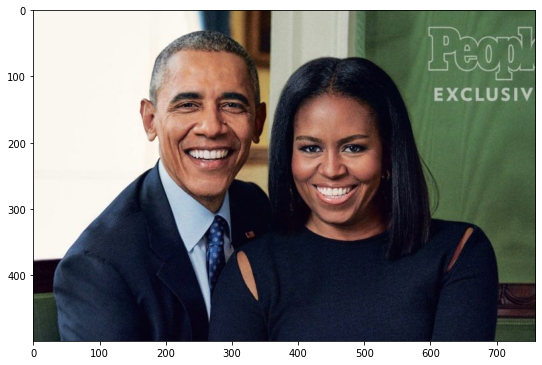

In [2]:
image = cv2.imread('images/obamas.jpg')

image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(9,9))
plt.imshow(image_RGB)

(500, 759, 3)


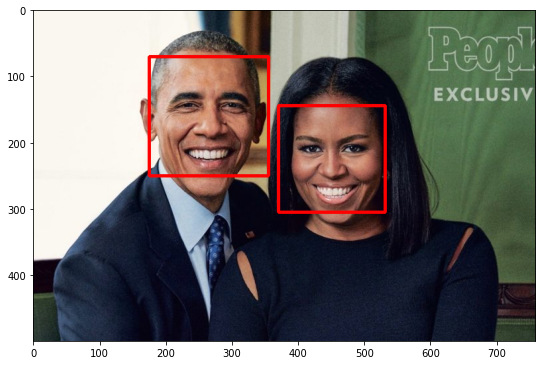

In [3]:
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(image, 1.2, 2)

image_with_detections = image_RGB.copy()
print(image_with_detections.shape)

for (x,y,w,h) in faces:

    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

In [4]:
model = load_model('landmark-model.h5')

In [5]:
def denormalize_keypoints(keypoints):
    keypoints = keypoints*50+100
    return keypoints

In [6]:
def show_all_keypoints(image, predicted_key_pts):
    plt.figure(figsize=(20,10))

    predicted_key_pts = predicted_key_pts.astype(float).reshape(-1,2)

    predicted_key_pts = denormalize_keypoints(predicted_key_pts)

    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='g')

    plt.show()

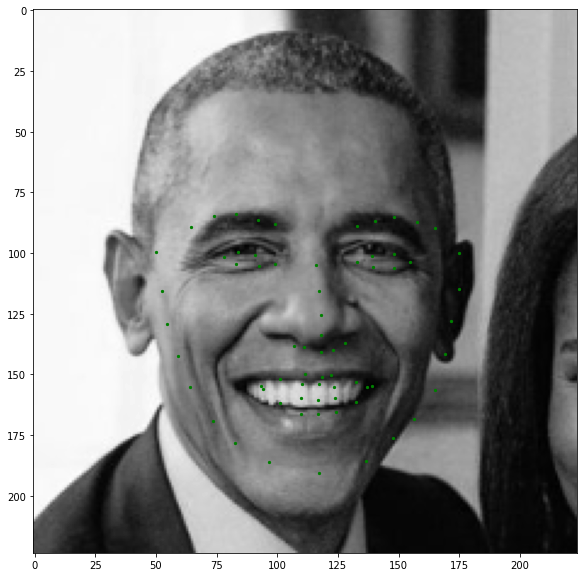

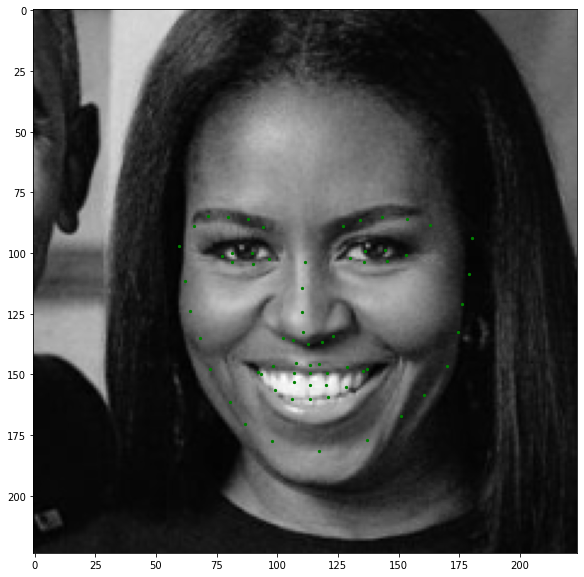

In [7]:
image_copy = np.copy(image)



for (x,y,w,h) in faces:
    roi = image_copy[y-50:y+h+50, x-50:x+w+50]
    roi=cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    roi=roi/255.0

    new_w=224
    new_h=224
    roi_plot = cv2.resize(roi, (new_w, new_h))

    roi = np.reshape(roi_plot,(1,new_w,new_h,1))

    prediction = model.predict(roi)

    show_all_keypoints(roi_plot,prediction)